In [1]:
import matplotlib.pyplot as plt
from rDLSpp import IOfuncs as iof
from rDLSpp import RheoConfig as rconf

import logging 

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logger = logging.getLogger('matplotlib')
logger.setLevel(logging.WARNING)
logging.info('RheoDLS postprocessing tutorial started')

INFO:root:RheoDLS postprocessing tutorial started


First, we need a folder where we saved the result of a rheology experiment:
In this folder, there should be a RheoConfig file (e.g. Config_Rheo.ini). This config file can be digested using the ```RheoConfig``` class:

In [2]:
froot = r'D:\Data\Gonzalo\240926_HS1.4_PEG10_Agg_UVX\AggreagationNPs'
rheo_protocol = rconf.RheoProtocol(froot, 'Config_Rheo.ini', 'expLog.txt')
rheo_protocol

INFO:root:501 rows read from expLog file D:\Data\Gonzalo\240926_HS1.4_PEG10_Agg_UVX\AggreagationNPs\expLog.txt


<RheoProtocol (2 intervals)>

A ```RheoConfig``` class contains a list of intervals (```RheoInterval``` objects)

In [3]:
print(rheo_protocol.ToString())


|--------------------|
| RheoProtocol class |
|--------------------|
| > Folder    : D:\Data\Gonzalo\240926_HS1.4_PEG10_Agg_UVX\AggreagationNPs
| > AxisID    : 0
| > Gap       : 1.0
| > OutFolder : D:\Data\Gonzalo\240926_HS1.4_PEG10_Agg_UVX\AggreagationNPs
| > 2 Intervals
|   [000] OSCILL_POS (01_TimeSweep) - A=0.01; T=1.0; off=-1.0; rep 500x
|   [001] SWEEP_STRAIN (02_StrainSweep) - w=6.283; A=[0.01,1.0]; 201 pts ASC; off=-1.0; rep 1x; DISABLED


A sweep-type ```RheoInterval``` is a bundle for a series of steps, each step being an elementary ```RheoInterval``` object. It can be unpacked:

In [4]:
print(rheo_protocol.ToString(unpacked=True))


|--------------------|
| RheoProtocol class |
|--------------------|
| > Folder    : D:\Data\Gonzalo\240926_HS1.4_PEG10_Agg_UVX\AggreagationNPs
| > AxisID    : 0
| > Gap       : 1.0
| > OutFolder : D:\Data\Gonzalo\240926_HS1.4_PEG10_Agg_UVX\AggreagationNPs
| > 2 Intervals (500 sub-intervals):
|   [000] OSCILL_POS (01_TimeSweep_0000.txt) - A=0.01; T=1.0; off=-1.0; rep 1x
|   [001] OSCILL_POS (01_TimeSweep_0001.txt) - A=0.01; T=1.0; off=-1.0; rep 1x
|   [002] OSCILL_POS (01_TimeSweep_0002.txt) - A=0.01; T=1.0; off=-1.0; rep 1x
|   [003] OSCILL_POS (01_TimeSweep_0003.txt) - A=0.01; T=1.0; off=-1.0; rep 1x
|   [004] OSCILL_POS (01_TimeSweep_0004.txt) - A=0.01; T=1.0; off=-1.0; rep 1x
|   [005] OSCILL_POS (01_TimeSweep_0005.txt) - A=0.01; T=1.0; off=-1.0; rep 1x
|   [006] OSCILL_POS (01_TimeSweep_0006.txt) - A=0.01; T=1.0; off=-1.0; rep 1x
|   [007] OSCILL_POS (01_TimeSweep_0007.txt) - A=0.01; T=1.0; off=-1.0; rep 1x
|   [008] OSCILL_POS (01_TimeSweep_0008.txt) - A=0.01; T=1.0; off=-1.0; r

Each elementary ```RheoInterval``` has a filename associated. This file is expected to have that name and to be in the same folder as the configuration file. 

In [5]:
list_names = rheo_protocol.GetFullFilenames()
list_names

['D:\\Data\\Gonzalo\\240926_HS1.4_PEG10_Agg_UVX\\AggreagationNPs\\01_TimeSweep_0000.txt',
 'D:\\Data\\Gonzalo\\240926_HS1.4_PEG10_Agg_UVX\\AggreagationNPs\\01_TimeSweep_0001.txt',
 'D:\\Data\\Gonzalo\\240926_HS1.4_PEG10_Agg_UVX\\AggreagationNPs\\01_TimeSweep_0002.txt',
 'D:\\Data\\Gonzalo\\240926_HS1.4_PEG10_Agg_UVX\\AggreagationNPs\\01_TimeSweep_0003.txt',
 'D:\\Data\\Gonzalo\\240926_HS1.4_PEG10_Agg_UVX\\AggreagationNPs\\01_TimeSweep_0004.txt',
 'D:\\Data\\Gonzalo\\240926_HS1.4_PEG10_Agg_UVX\\AggreagationNPs\\01_TimeSweep_0005.txt',
 'D:\\Data\\Gonzalo\\240926_HS1.4_PEG10_Agg_UVX\\AggreagationNPs\\01_TimeSweep_0006.txt',
 'D:\\Data\\Gonzalo\\240926_HS1.4_PEG10_Agg_UVX\\AggreagationNPs\\01_TimeSweep_0007.txt',
 'D:\\Data\\Gonzalo\\240926_HS1.4_PEG10_Agg_UVX\\AggreagationNPs\\01_TimeSweep_0008.txt',
 'D:\\Data\\Gonzalo\\240926_HS1.4_PEG10_Agg_UVX\\AggreagationNPs\\01_TimeSweep_0009.txt',
 'D:\\Data\\Gonzalo\\240926_HS1.4_PEG10_Agg_UVX\\AggreagationNPs\\01_TimeSweep_0010.txt',
 'D:\\Data

A rheology experiment also produces a log file as an output. the ```RheoConfig``` class can read that as well

In [6]:
rheo_explog = rheo_protocol.LoadExpLog()
rheo_explog

,ID,Time,Type,Name,Force,Displacement,Speed,Period,Offset,RelOffset,...,StartedOn,EndedOn,StartPos,EndPos,StartForce,EndForce,Trigger,Active,Axis,StrainControlled
0,2,100.769,0,01_TimeSweep,<err>,0.01,0.0628319,1,0,1,...,0.017188,100.456,20.0095,20.0095,-0.155583,-0.113163,0,1,0,1
1,2,201.563,0,01_TimeSweep,<err>,0.01,0.0628319,1,0,1,...,100.785,201.243,20.0096,20.0096,-0.147343,-0.119785,0,1,0,1
2,2,302.351,0,01_TimeSweep,<err>,0.01,0.0628319,1,0,1,...,201.579,302.026,20.0096,20.0096,-0.156316,-0.153844,0,1,0,1
3,2,403.115,0,01_TimeSweep,<err>,0.01,0.0628319,1,0,1,...,302.367,402.798,20.0096,20.0096,-0.172308,-0.158147,0,1,0,1
4,2,503.907,0,01_TimeSweep,<err>,0.01,0.0628319,1,0,1,...,403.134,503.592,20.0096,20.0095,-0.154607,-0.118259,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2,2745.31,0,01_TimeSweep,<err>,0.01,0.0628319,1,0,1,...,2644.53,2744.99,20.0096,20.0096,-0.130161,-0.118595,0,1,0,1
496,2,2846.1,0,01_TimeSweep,<err>,0.01,0.0628319,1,0,1,...,2745.32,2845.79,20.0096,20.0096,-0.15006,-0.104038,0,1,0,1
497,2,2946.92,0,01_TimeSweep,<err>,0.01,0.0628319,1,0,1,...,2846.12,2946.6,20.0096,20.0096,-0.103397,-0.116092,0,1,0,1
498,2,3047.69,0,01_TimeSweep,<err>,0.01,0.0628319,1,0,1,...,2946.94,3047.38,20.0096,20.0096,-0.091525,-0.0601215,0,1,0,1


A rheology data file has 6 columns: ```[row_idx, Time, Position, Speed, PosError, Force]```. To open it we can use the ```IOfuncs.ReadRheoData(fname, usecols, unpack)``` function, specifying the columns that we want to read in the ```usecols``` parameter. For a step-rate test, we read time, position, speed and force:

INFO:root:Reading columns (1, 2, 3, 6) from file D:\Data\Gonzalo\240926_HS1.4_PEG10_Agg_UVX\AggreagationNPs\01_TimeSweep_0020.txt (unpack)


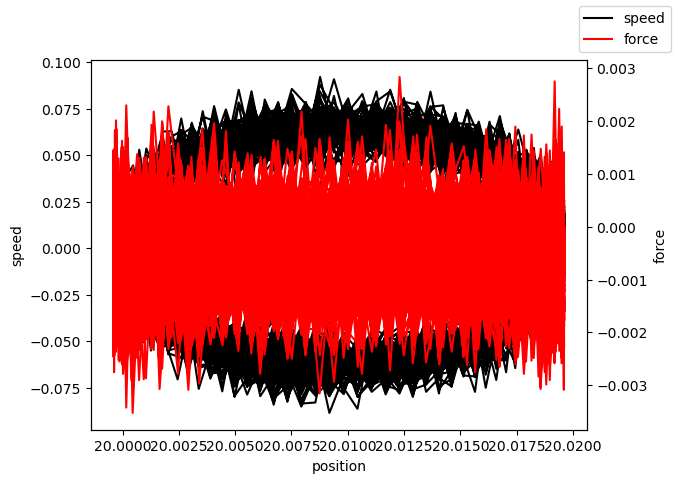

In [11]:
fidx = 20
int_time, int_pos, int_speed, int_force = iof.ReadRheoData(list_names[fidx], usecols=(1, 2, 3, 6), unpack=True)
if int_pos is not None:
    fig, ax = plt.subplots()
    ax.plot(int_pos, int_speed, 'k-', label='speed')
    ax.set_xlabel('position')
    ax.set_ylabel('speed')
    ax2 = ax.twinx()
    ax2.plot(int_pos, int_force, 'r-', label='force')
    ax2.set_ylabel('force')
    fig.legend()